Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64
         Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
Outcome                                                                      
0           3.298000  109.980000      68.184000      19.664000   68.792000   
1           4.865672  141.257463      70.824627      22.164179  100.335821   

               BMI  DiabetesPedigreeFunction        Age  
Outcome                                                  
0        30.304200                  0.429734  31.190000  
1        35.142537                  0.550500  37.067164  


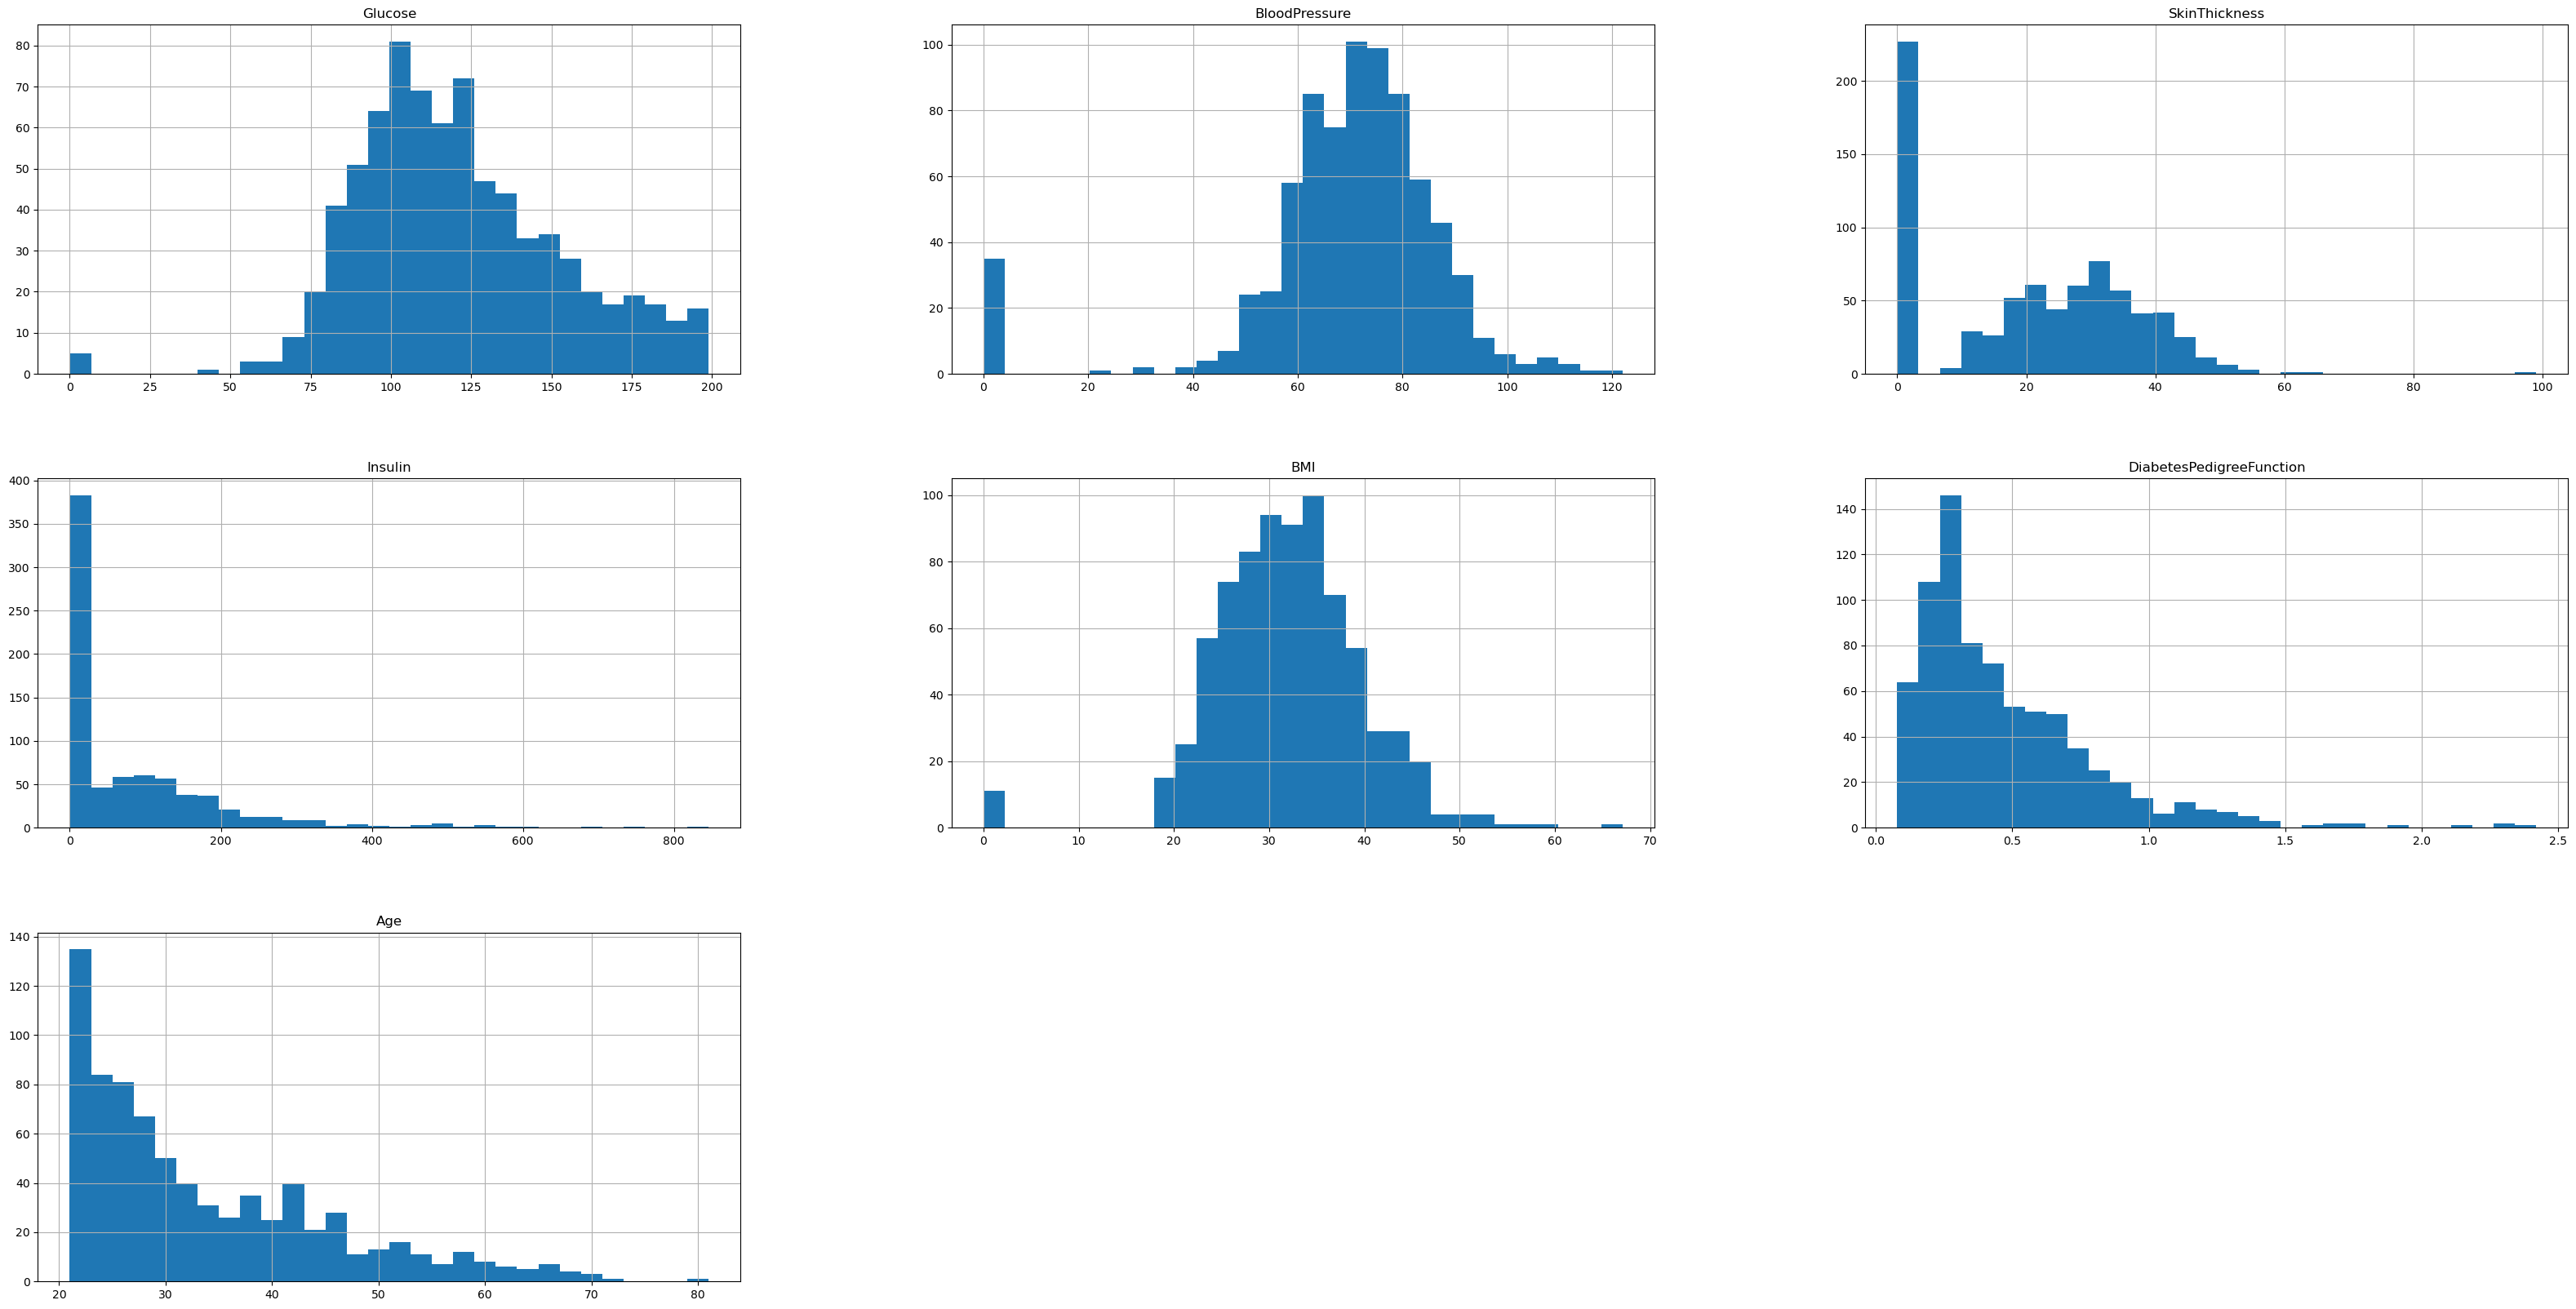

(614, 8)
(154, 8)


In [17]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.metrics import accuracy_score

# load dataset
df=pd.read_csv("diabetes.csv")
df.head()



#CHECK FOR NULL VALUES
print(df.isnull().sum())


#no. of classes
df.Outcome.value_counts()

print(df.groupby('Outcome').mean())


#visualizing the data
df.iloc[:,1:-1].hist(bins=30,figsize=(40,20))
plt.show()



#CHECK FOR UNNESSESARY 0 VALUES
df.iloc[:,1:-1].isin([0]).sum()



#replace 0 values with median. (can take other values)
for col in ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']:
    df[col]=df[col].replace({0:df[col].median()})
df.iloc[:,1:-3].isin([0]).sum()


#feature selection using Random forest
from sklearn.ensemble import RandomForestClassifier
x= df.drop(columns='Outcome',axis=1)
y=df['Outcome']



#select 4-5 features on the basis of score
#df_new=df[['Glucose','Insulin','BMI','DPF','Age']]
#df.shape



#spliting the data
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2, stratify=y, random_state=42)
xtrain.shape

#feature scaling
from sklearn.preprocessing import StandardScaler
std= StandardScaler()

std_train=std.fit_transform(xtrain)
std_test=std.transform(xtest)

print(std_train.shape)
print(std_test.shape)


LOGISTIC REGRESSION

In [2]:
log = LogisticRegression(C=12)
log.fit(std_train,ytrain)

train_score= log.score(std_train,ytrain)
test_score=log.score(std_test,ytest)

print(train_score)
print(test_score)

print(np.bincount(ytest))

#check model performance using confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(ytest,log.predict(std_test))


0.7931596091205212
0.7012987012987013
[100  54]


array([[81, 19],
       [27, 27]], dtype=int64)

SVM

In [3]:
clf = SVC(kernel="linear",C=10) #model assumes that data is linear seprable

clf.fit(std_train,ytrain)

train_score= clf.score(std_train,ytrain)
test_score= clf.score(std_test,ytest)

print(train_score)
print(test_score)


#hyperparameter tuning
from sklearn.model_selection import GridSearchCV
p={'C':[.001,.01,.1,10]}
gd=GridSearchCV(SVC(kernel='linear'),param_grid=p,cv=5,scoring='accuracy')
gd.fit(std_train,ytrain)

print(gd.best_params_)
gd.best_score_

clf_final=gd.best_estimator_
clf_final.score(std_test,ytest)

#check model performance using confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(ytest,clf.predict(std_test))


0.7882736156351792
0.7077922077922078
{'C': 10}


array([[82, 18],
       [27, 27]], dtype=int64)

DECISION TREE

In [4]:
from sklearn.tree import DecisionTreeClassifier

dt=DecisionTreeClassifier(max_depth=5)
dt.fit(std_train,ytrain)
y_pred3=dt.predict(std_test)

train_score= dt.score(std_train,ytrain)
test_score= dt.score(std_test,ytest)

print(train_score)
print(test_score)



#check model performance using confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(ytest,dt.predict(std_test))

0.8110749185667753
0.7792207792207793


array([[80, 20],
       [14, 40]], dtype=int64)

RANDOM FOREST

In [5]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=10,random_state=15)

rf.fit(std_train,ytrain)

rf_train_score=rf.score(std_train,ytrain)
print(rf_train_score)

rf_test_score=rf.score(std_test,ytest)
print(rf_test_score)


#check model performance using confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(ytest,dt.predict(std_test))

0.9820846905537459
0.7337662337662337


array([[80, 20],
       [14, 40]], dtype=int64)

In [8]:
input_data = (10,166,72,19,175,25.8,0.587,51)

#changing the input data to numpy array
input_array = np.asarray(input_data)

#reshape the array as we are predicting for one instance
reshape_input = input_array.reshape(1,-1)

#standardize the data
std_data = std.transform(reshape_input)
print(std_data)

prediction = rf.predict(std_data)
print(prediction)

if (prediction == 0):
    print('The person is not diabetic ;)')
else:
    print('The person is diabetic :o')
    

[[ 1.86648903  1.47865077 -0.01141979 -0.89631739  0.83820316 -0.97412617
   0.33200396  1.49136095]]
[1]
The person is diabetic :o


C:\Users\deeps\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [28]:
import pickle
pickle.dump(rf, open('Diabetic_Model.pkl','wb'))